In [39]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
import os
import math
import pandas as pd

In [40]:
def sigma_each(x):
    std = np.std(x, axis=0 , ddof= 1)
    std = np.array(std)
    aa = Math.pow(std,2)
    return aa

In [41]:
def AI(arr):
    trisum = 0
    result = []
    for i in range(len(arr)):
        for j in range(3):
            trisum += arr[i][j]
        
        result.append(Math.sqrt(Math.max(trisum/3,0)))
    result = np.array(result)
    return result

In [42]:
INPUT_SIGNAL_TYPES = [
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [43]:
def load_X(X_signals_paths):
    X_signals = []

    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()

    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
      "UCI HAR Dataset/train/" + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    "UCI HAR Dataset/test/" + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)

# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.strip().split(' ') for row in file   #.replace('  ', ' ')
        ]],
        dtype=np.int32
    )
    file.close()

    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

y_train_path = "UCI HAR Dataset/train/y_train.txt"
y_test_path = "UCI HAR Dataset/test/y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [44]:
print(y_train[0][0])
print(y_test)

4
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]


In [45]:
X_train_dict = {}
labels_count = len(LABELS)
all_xy_train = []

for i in range(labels_count):
    X_train_dict[i] = []

for i in range(len(X_train)):
    for X_i in X_train[i]:
        X_i = [float(x) for x in X_i]
        X_train_dict[y_train[i][0]].append(X_i)
        all_xy_train.append([X_i,y_train[i][0]])

## Load Subject

In [46]:
def load_subject(subject_path):
    file = open(subject_path,'r')
    # Read dataset from disk, dealing with text file's syntax
    s_ = np.array(
        [elem[0] for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    
    return s_
    
subject_train_path = "UCI HAR Dataset/train/subject_train.txt"
subject_test_path = "UCI HAR Dataset/test/subject_test.txt"

subject_train = load_subject(subject_train_path)
subject_test = load_subject(subject_test_path)

len_train = len(subject_train)
len_test = len(subject_test)

In [47]:
print(subject_train)

[ 1  1  1 ... 30 30 30]


## Create a dictionary for subject

In [48]:
len_train = len(y_train)
len_test = len(y_test)

len_subj = 30
y_train_dict = {}

for i in range(1,len_subj+1):
    y_train_dict[i] = []
    
    
for i in range(len_train):
    y_train_dict[subject_train[i]].append([y_train[i][0],X_train[i]])  

for i in range(1,len_subj+1):
    print(i,len(y_train_dict[i]))
    
print('-------')

for i in range(10):
    print(y_train_dict[1][i][1])

1 347
2 0
3 341
4 0
5 302
6 325
7 308
8 281
9 0
10 0
11 316
12 0
13 0
14 323
15 328
16 366
17 368
18 0
19 360
20 0
21 408
22 321
23 372
24 0
25 409
26 392
27 376
28 382
29 344
30 383
-------
[[ 1.012817   -0.1232167   0.1029341 ]
 [ 1.022833   -0.1268756   0.1056872 ]
 [ 1.022028   -0.1240037   0.1021025 ]
 [ 1.017877   -0.1249279   0.1065527 ]
 [ 1.02368    -0.1257667   0.1028135 ]
 [ 1.016974   -0.124462    0.1074931 ]
 [ 1.017746   -0.1273606   0.1093857 ]
 [ 1.019263   -0.1278912   0.1038862 ]
 [ 1.016417   -0.1258682   0.1024732 ]
 [ 1.020745   -0.1243682   0.0975659 ]
 [ 1.018643   -0.1231382   0.09764665]
 [ 1.019521   -0.1213345   0.09537356]
 [ 1.02026    -0.1183578   0.09367106]
 [ 1.018041   -0.120062    0.09921876]
 [ 1.020829   -0.1221186   0.09997368]
 [ 1.018644   -0.12008     0.09889572]
 [ 1.019398   -0.1209017   0.0962825 ]
 [ 1.020399   -0.1213949   0.09765831]
 [ 1.019222   -0.1215677   0.1004408 ]
 [ 1.022093   -0.1246812   0.09846986]
 [ 1.020433   -0.1254896   0.

[[ 1.023127   -0.1200157   0.09111667]
 [ 1.021882   -0.1214994   0.0926756 ]
 [ 1.019178   -0.1228407   0.09606378]
 [ 1.015861   -0.1237173   0.09989713]
 [ 1.012893   -0.1238168   0.0976265 ]
 [ 1.016451   -0.1213038   0.08829054]
 [ 1.020331   -0.1212583   0.08224058]
 [ 1.020266   -0.125411    0.08109954]
 [ 1.021759   -0.1294583   0.08129546]
 [ 1.018649   -0.1298562   0.08192691]
 [ 1.013117   -0.1277827   0.08754584]
 [ 1.016167   -0.1256833   0.09374196]
 [ 1.018977   -0.121083    0.09105401]
 [ 1.016653   -0.1178711   0.08817375]
 [ 1.017782   -0.1181788   0.08861402]
 [ 1.020528   -0.1174953   0.09200702]
 [ 1.021877   -0.1174196   0.09805868]
 [ 1.022096   -0.1165236   0.09542812]
 [ 1.020731   -0.116636    0.09248751]
 [ 1.020761   -0.1209724   0.0956355 ]
 [ 1.020405   -0.1256922   0.09434238]
 [ 1.020213   -0.129232    0.09421302]
 [ 1.021675   -0.126144    0.09695504]
 [ 1.019989   -0.1194885   0.09729701]
 [ 1.017997   -0.1173506   0.09752661]
 [ 1.017391   -0.1177075 

In [49]:
all_data = []
all_label = []

all_subject = np.hstack((subject_train,subject_test))

for i in range(len(X_train)):
    all_data.append(X_train[i])
    all_label.append(y_train[i])
    
for i in range(len(X_test)):
    all_data.append(X_test[i])
    all_label.append(y_test[i])
    
all_dict = {}
for i in range(1,len_subj+1):
    all_dict[i] = []

for i in range(len(all_data)):
    all_dict[all_subject[i]].append([all_label[i][0],all_data[i]])

## Calculate SD for Rest State

[0.00349329 0.00465817 0.00543154]


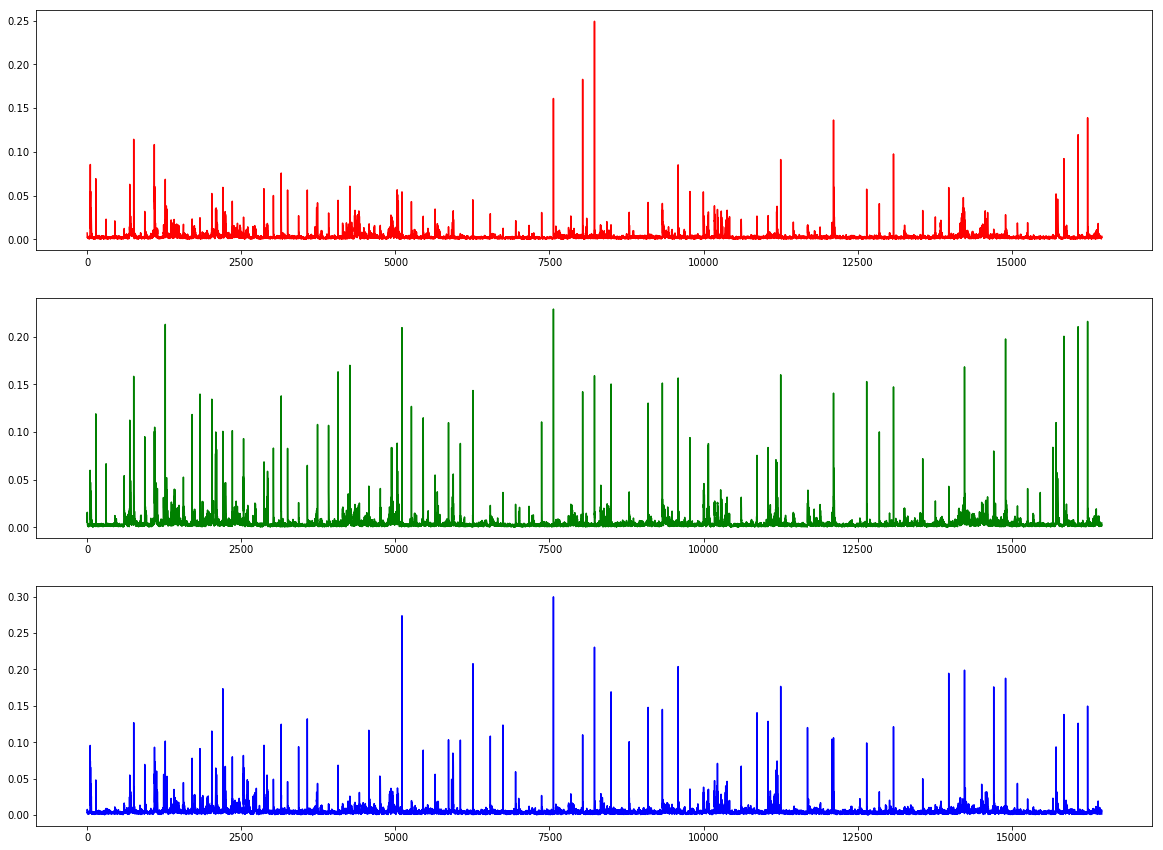

<Figure size 1152x432 with 0 Axes>

In [50]:
idx = [i for i in range(len(LABELS)) if(LABELS[i]=="SITTING")][0]
# print(idx)

rest_dict = X_train_dict[idx]
# print(len(rest_dict))

all_std = []


cnt = 0
H = 10
window = []
for X_i in rest_dict:
    
    cnt += 1
    window.append(X_i)
    if(cnt==H):
        std_i = np.std(window,axis=0)
        all_std.append(std_i)
        cnt = 0
        window = []

all_std = np.array(all_std)
# print(all_std)

C = 0.2
sum_std_i = [0,0,0]
count = [0,0,0]
for elem in all_std:
    for i in range(len(elem)):
        if(elem[i]<=C):
            count[i] += 1
            sum_std_i[i] += elem[i]
    

sum_std_i = np.array(sum_std_i)
count = np.array(count)
std_i_bar = sum_std_i/count
print(std_i_bar)

# std_i_bar_ = [std_i_bar for i in range(3)]
# std_i_bar_ = np.array(std_i_bar_)
# print(std_i_bar_)

all_std_x = [e[0] for e in all_std]
all_std_y = [e[1] for e in all_std]
all_std_z = [e[2] for e in all_std]

fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
ax[0].plot(all_std_x,'r')
ax[1].plot(all_std_y,'g')
ax[2].plot(all_std_z,'b')

plt.figure(figsize=(16,6))
plt.show()

In [51]:
def equation_bi(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    
    diff_std = std_i**2 - std_i_bar**2
    
    diff_std_ = diff_std / std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
#     print(diff_std_)
#     print('---------')

#     all_std.append(diff_std_)
    all_std = np.array(diff_std)
#     print(all_std)
    
    ai = max(np.sum(all_std)/3,0)
    ai = np.sqrt(ai)
    
#     print(ai)
    
    return ai

## Activity Index

In [52]:
import matplotlib.pyplot as plt
import matplotlib

## AI for each labels

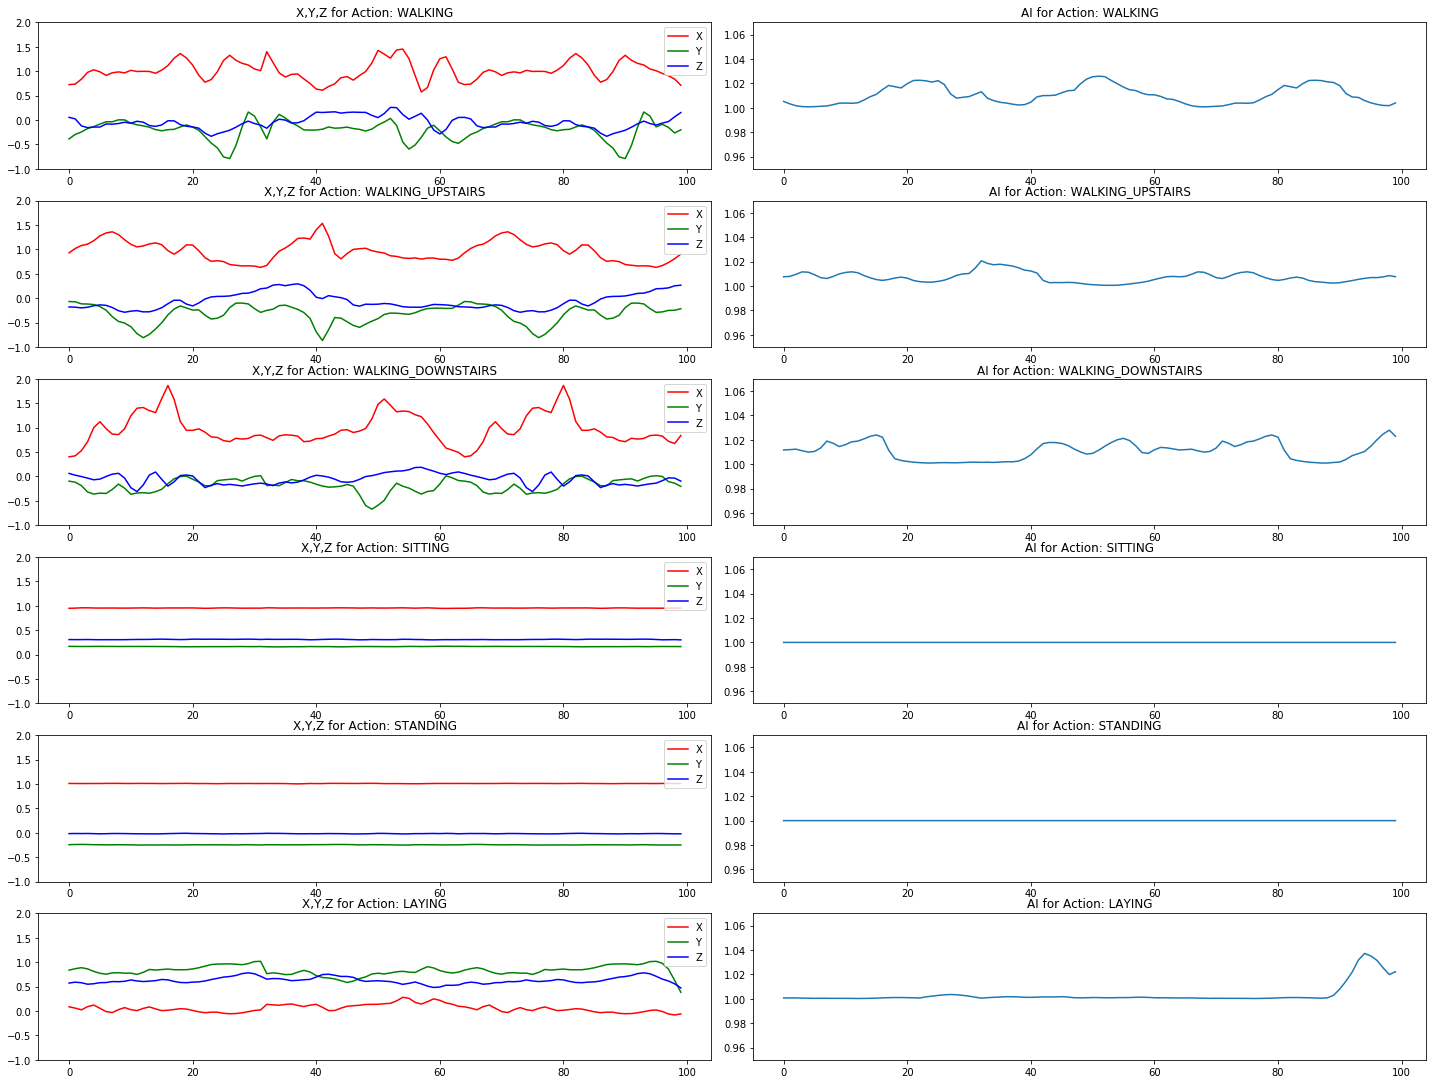

<Figure size 1152x648 with 0 Axes>

In [53]:
fig, axes = plt.subplots(nrows=labels_count, ncols=2, figsize=(20,15))
fig.tight_layout()

X_train_x = []
X_train_y = []
X_train_z = []
X_ai = []

ai_labels = []

count = 0
H = 10

for i in range(labels_count):
    ai_all = []
    
    X_train_dict[i] = np.array(X_train_dict[i])
#     graph_size = int(len(X_train_dict[i]))
    graph_size = 5000
    
    for j in range(2400,2500):
        
        if(j+H<len(X_train_dict[i])):
            X_ai=[]
            
            elem = X_train_dict[i][j]
            X_train_x.append(elem[0])
            X_train_y.append(elem[1])
            X_train_z.append(elem[2])
            
            if(j-H>=0):
                for k in range(H):
                    elem = X_train_dict[i][j+k]

                    X_ai.append([elem[0],elem[1],elem[2]])
        
            ai_val = equation_bi(X_ai)
            ai_all.append(ai_val)
    
#     print(ai_all)
    ai_labels.append(ai_all)
#     print(ai_labels)
    
    ax = axes[i,0]
    ax.plot(X_train_x,'r',label='X')
    ax.plot(X_train_y,'g',label='Y')
    ax.plot(X_train_z,'b',label='Z')
    ax.set_title('X,Y,Z for Action: ' + LABELS[i])
    ax.set_ylim(bottom=-1.0,top=2.0)
    ax.legend(loc='upper right')
        
    ax = axes[i,1]
    ax.plot(ai_all)
    ax.set_title('AI for Action: ' + LABELS[i])
    ax.set_ylim(bottom=0.95,top=1.07)
    
    X_train_x =[]
    X_train_y =[]
    X_train_z =[]
    
    
plt.figure(figsize=(16,9))
fig.savefig('fig1.png', dpi = 300)

plt.show()

## Average AI per Activity 

In [17]:
avg = 0
for i in range(len(ai_labels)):
    avg = np.average(ai_labels[i])
    print(LABELS[i] , avg)

WALKING 1.012317635905472
WALKING_UPSTAIRS 1.0062668447498206
WALKING_DOWNSTAIRS 1.0142759903104661
SITTING 1.0000253729785353
STANDING 0.9999862067354268
LAYING 1.0004527094202407


## SD AI per Activty

In [19]:
sd = 0
for i in range(len(ai_labels)):
    sd = np.std(ai_labels[i])
    print(LABELS[i] , sd)

WALKING 0.008284709266757109
WALKING_UPSTAIRS 0.003982062304198153
WALKING_DOWNSTAIRS 0.011555807307337556
SITTING 0.0002850337326194712
STANDING 3.7762820247953735e-05
LAYING 0.002952194268931483


In [21]:
from scipy import stats

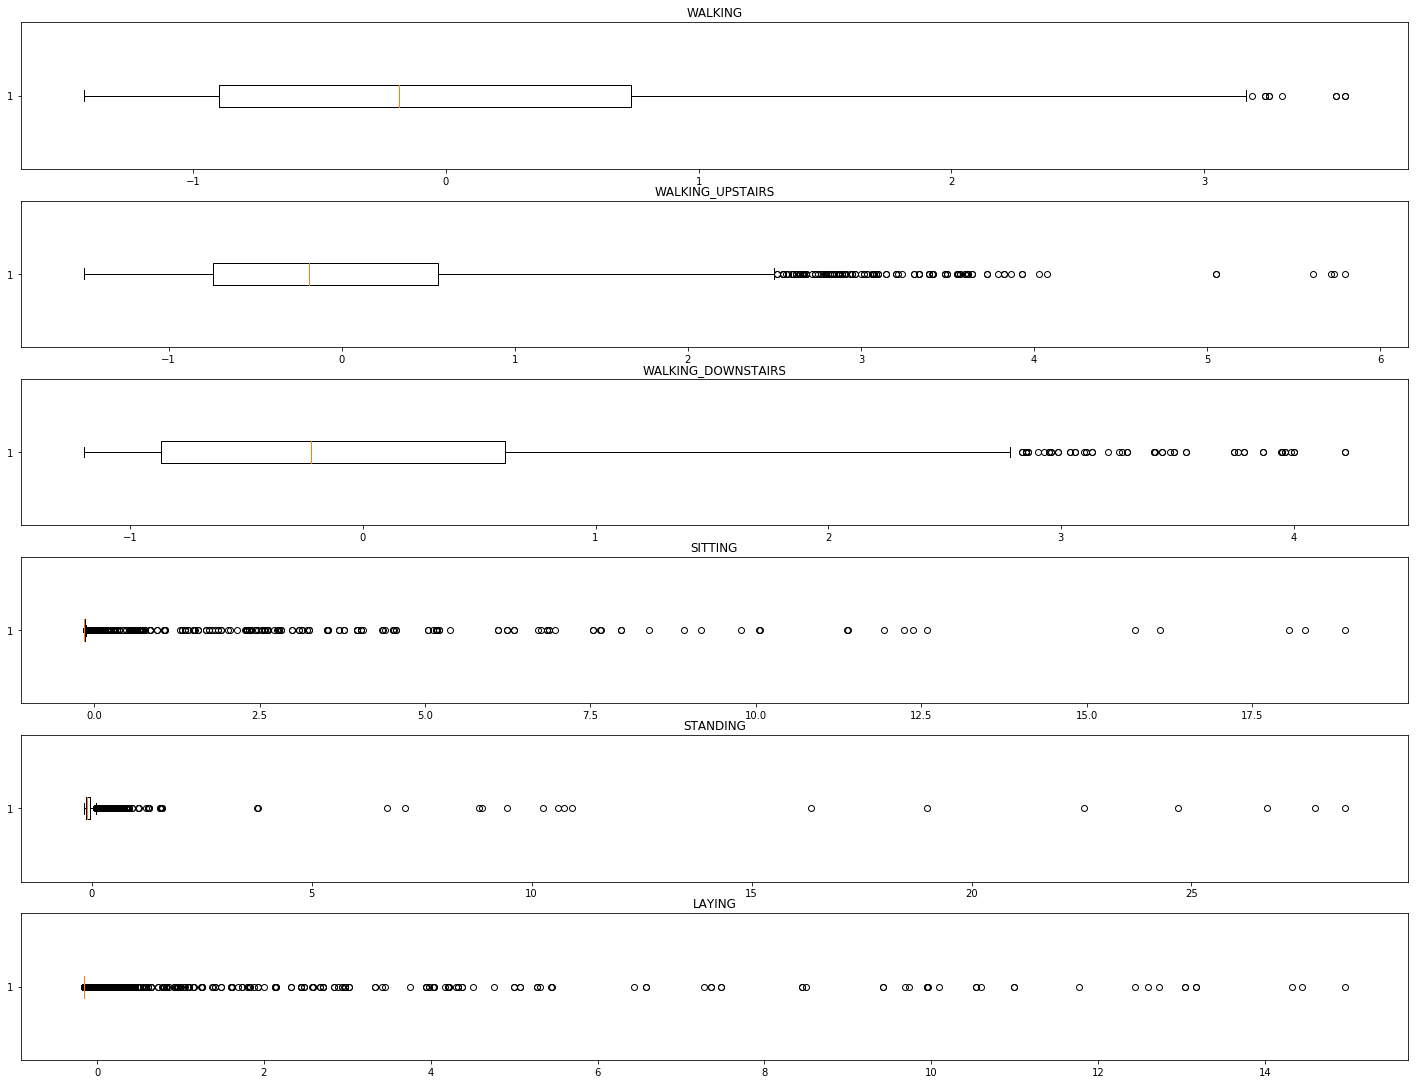

In [22]:
z = []
fig, axes = plt.subplots(nrows=labels_count, ncols=1, figsize=(20,15))
plt.tight_layout()
cnt = 0
for ai in ai_labels:
#     print(ai)
    z_score = stats.zscore(ai)
    z.append(z_score)
    axes[cnt].boxplot(z_score, vert=False)
    axes[cnt].set_title(LABELS[cnt])
    cnt += 1
    
plt.show()

## Z-score per activity comparing to all activities

In [24]:
ai_lb_cc = ai_labels[0] + ai_labels[1]
for i in range(2,len(ai_labels)):
    ai_lb_cc += ai_labels[i]
    
ai_mean = np.mean(ai_lb_cc)
ai_sd = np.mean(ai_lb_cc)
    
for i in range(len(ai_labels)):
    z = [(x-ai_mean)/ai_sd for x in ai_labels[i]]
    z_mean = np.mean(z)
    
    print(LABELS[i],':',z_mean)

WALKING : 0.006726151325591465
WALKING_UPSTAIRS : 0.0007087814047806951
WALKING_DOWNSTAIRS : 0.008673688860396619
SITTING : -0.005498215917056058
STANDING : -0.0055371658274280065
LAYING : -0.005073239846285133


## AI for each subject

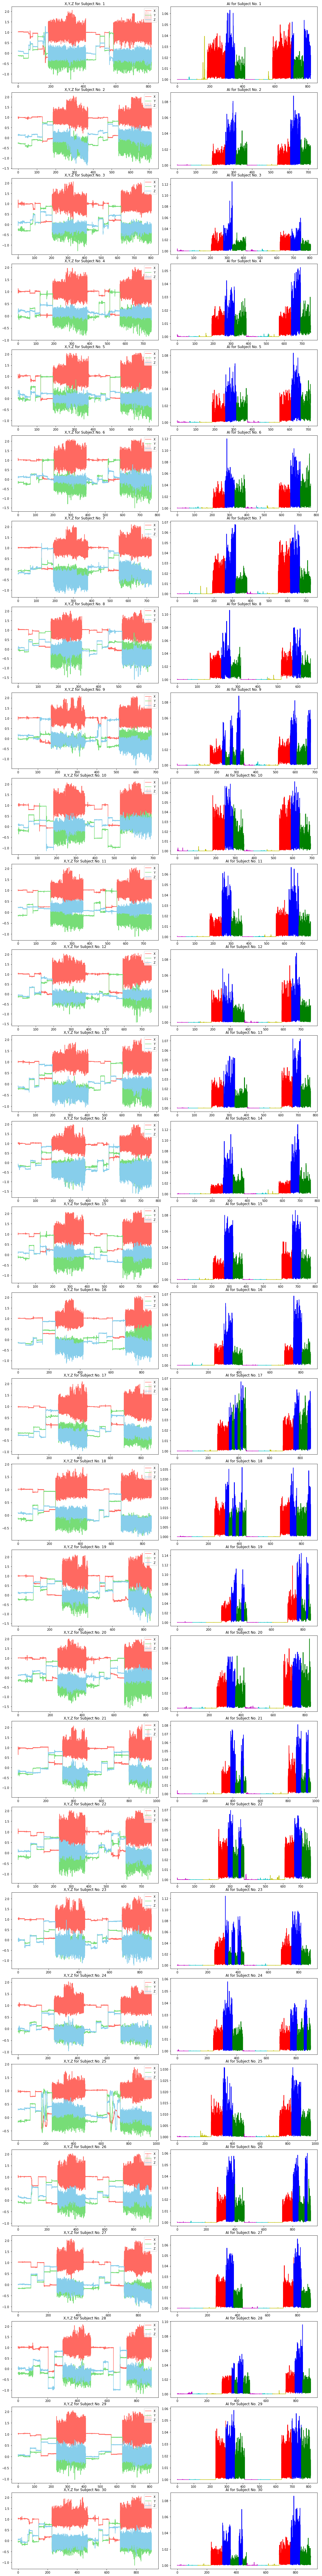

<Figure size 1080x3600 with 0 Axes>

In [25]:
label_colors = ['r','g','b','c','m','y']
    # "WALKING: red", "WALKING_UPSTAIRS: green", "WALKING_DOWNSTAIRS: blue",
    # "SITTING: cyan", "STANDING: magenta", "LAYING: yellow"

count = 0
H = 10
plot_subj = 30
    
fig, axes = plt.subplots(nrows=plot_subj, ncols=2, figsize=(15,plot_subj*4))
fig.tight_layout()

all_ai_x = []
all_ai_y = []
all_ai_z = []
acc_ai = []
all_act = []
ai_subj = []
c = 0

for i in range(plot_subj):
    idx = i+1
    
    ai_all = []
    y_all = []
    
    all_y = [e[0] for e in all_dict[idx]]
    all_X = [e[1] for e in all_dict[idx]]
    
    
    graph_size = int(len(all_X))
    
#     print((all_X[graph_size-2]))
#     graph_size = 100 if (len(acc_train)>0) else 0
    
    #print(idx, len(acc_train))
    #print('*********')
    
    for j in range(graph_size):
        for k in range(len(all_X[j])):
            
            acc_ai = []
            
            if(k-H>=0):
                elem = all_X[j][k]
                
                all_ai_x.append(float(elem[0]))
                all_ai_y.append(float(elem[1]))
                all_ai_z.append(float(elem[2]))
                y_all.append(all_y[j])

                for m in range(H,0,-1):
                    elem = all_X[j][k-m]
                    acc_ai.append([elem[0],elem[1],elem[2]])
                    
                ai_val = equation_bi(acc_ai)
#                 print(ai_val)
                
                ai_all.append(ai_val)
    
#     print(ai_all)
    all_act.append(y_all)
    ai_subj.append(ai_all)
    
    
    ax = axes[c,0]
    
#     print(len(all_ai_x))
# i/50 -> sec
    graph_x_axis = [i/50 for i in range(len(all_ai_x))]
    ax.plot(graph_x_axis,all_ai_x,'#FF6961',label='X')
    ax.plot(graph_x_axis,all_ai_y,'#77DD77',label='Y')
    ax.plot(graph_x_axis,all_ai_z,'#87CEEB',label='Z')

    ax.set_title('X,Y,Z for Subject No. ' + str(idx))
#     ax.set_ylim(bottom=-1.0,top=2.0)
    ax.legend(loc='upper right')

    ax = axes[c,1]

    if(graph_size!=0):
        prev_y_j_ = y_all[0]
        ai_graph = []
        graph_x_axis = []
        
        for j in range(len(all_ai_x)):
            y_j_ = y_all[j]
            
            graph_x_axis.append(j/50)
            ai_graph.append(ai_all[j])
            
            if(y_j_!=prev_y_j_ or (j+1)==len(all_ai_x)):
                ax.plot(graph_x_axis,ai_graph,color=label_colors[prev_y_j_])
                
                ai_graph = []
                graph_x_axis = []
            
            prev_y_j_ = y_j_
    
#     ax.plot(ai_all)
    ax.set_title('AI for Subject No. ' + str(idx))
#     ax.set_ylim(bottom=0.99,top=1.17)

    all_ai_x = []
    all_ai_y = []
    all_ai_z = []
    c +=1
    
#     print(ai_labels)
    
plt.figure(figsize=(15,50))
fig.savefig('fig4.png', dpi = 300)

plt.show()

## Average AI per subject (each Activity)

In [26]:
print('Subject', 'Walking', 'Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying')
for i in range(plot_subj):
    a1 = 0
    a2 = 0
    a3 = 0
    a4 = 0
    a5 = 0
    a6 = 0
    c,c1,c2,c3,c4,c5,c6=0,0,0,0,0,0,0
    for j in all_act[i]:
        if(j == 0):
            a1 += ai_subj[i][c]
            c1 += 1
        elif(j == 1):
            a2 += ai_subj[i][c]
            c2 += 1
        elif(j == 2):
            a3 += ai_subj[i][c]
            c3 += 1
        elif(j == 3):
            a4 += ai_subj[i][c]
            c4 += 1
        elif(j == 4):
            a5 += ai_subj[i][c]
            c5 += 1
        elif(j == 5):
            a6 += ai_subj[i][c]
            c6 += 1
        c += 1
    print(i+1, a1/c1 , a2/c2, a3/c3,a4/c4,a5/c5,a6/c6)

Subject Walking Walking Upstairs Walking Downstairs Sitting Standing Laying
1 1.0116745888504157 1.0063394192845816 1.01429997842991 1.0000038028288198 0.9999837285557441 1.000298769585818
2 1.0073832625067747 1.0084556314047903 1.019126827770338 0.9999874066857583 0.9999962686638152 0.9999881108577365
3 1.0081781489087416 1.0067816499764886 1.0130039885409097 1.000037484718205 1.000065628199207 0.9999997126471335
4 1.0067691252697444 1.0075798288119133 1.011360022207281 1.0000170475584602 1.0000208901466903 1.0000259920869774
5 1.0098568964908825 1.012051255389024 1.0196002826769743 1.0000170630121643 1.000046277563065 0.999994540074163
6 1.010576462806122 1.0136467446571749 1.0250418243224342 1.000029931356905 1.0000304418130606 1.0000523410014421
7 1.0122882018966064 1.0072529319153327 1.0170814150018945 1.0000173273694946 1.000020648330336 1.0000183211046427
8 1.0154129407602823 1.0127253110469856 1.0232453819811076 0.9999930571139416 0.9999949653028251 1.0000255884465106
9 1.01173

## Average AI per subject (All Activity)

In [27]:
print('Subject', 'Average')
aaps = []
for i in range(plot_subj):
    a1 = 0
    c,c1=0,0
    for j in all_act[i]:
            a1 += ai_subj[i][c]
            c1 += 1
            c += 1
    aaps.append(a1/c1)
    print(i+1, a1/c1)
print('Average', np.average(aaps))

Subject Average
1 1.006224867238145
2 1.0057585835665448
3 1.0044503816230097
4 1.0041480296926322
5 1.0067637976573343
6 1.007714506984612
7 1.0060910140050756
8 1.0076358503715643
9 1.0060975418841935
10 1.006777851310003
11 1.004619355378823
12 1.005389213944431
13 1.0054506294407233
14 1.0065385648801288
15 1.0062619810553715
16 1.0041103968890661
17 1.0050356877376092
18 1.002725005717568
19 1.0085016916060723
20 1.0068539286723737
21 1.004735944704929
22 1.0069124946569965
23 1.0062540071581072
24 1.0035578250303685
25 1.002073478339036
26 1.0045694545421036
27 1.0041136830089281
28 1.0043327410634966
29 1.0052067021418662
30 1.0039241910404753
Average 1.0054276467113863


## SD AI per subject

In [28]:
print('Subject', 'Standard Deviation')
saps = []
for i in range(plot_subj):
    a1 = []
    c = 0
    for j in all_act[i]:
            a1.append(ai_subj[i][c])
            c += 1
    saps.append(np.std(a1))
    print(i+1, np.std(a1))
print("Avg SD", np.average(saps))

Subject Standard Deviation
1 0.008686049011994445
2 0.010305432082634366
3 0.007726156866449824
4 0.006190294246823199
5 0.010184518977999641
6 0.012883175707829887
7 0.010442224527162458
8 0.011595115591018538
9 0.010145857960909449
10 0.010850188760332736
11 0.007767719650230994
12 0.009530760467617838
13 0.008734784375648664
14 0.012106118703818307
15 0.011504038675850271
16 0.00802377592511114
17 0.008818020631653784
18 0.00449178741862206
19 0.01692131309123178
20 0.01201660393035854
21 0.00975712422879855
22 0.0111676827139861
23 0.0116433932158944
24 0.0065118340816815905
25 0.0035154194982124523
26 0.008552884486487182
27 0.0078124649479705995
28 0.008377979950184031
29 0.009038277393518384
30 0.007528558865306687
Avg SD 0.009427651866177928


## Max AI per subject

In [29]:
print('Subject', 'Walking', 'Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying')
for i in range(plot_subj):
    a1 = []
    a2 = []
    a3 = []
    a4 = []
    a5 = []
    a6 = []
    c = 0
    for j in all_act[i]:
        if(j == 0):
            a1.append(ai_subj[i][c])
        elif(j == 1):
            a2.append(ai_subj[i][c])
        elif(j == 2):
            a3.append(ai_subj[i][c])
        elif(j == 3):
            a4.append(ai_subj[i][c])
        elif(j == 4):
            a5.append(ai_subj[i][c])
        elif(j == 5):
            a6.append(ai_subj[i][c])
        c += 1
    print(i+1, np.amax(a1) , np.amax(a2), np.amax(a3),np.amax(a4),np.amax(a5),np.amax(a6))

Subject Walking Walking Upstairs Walking Downstairs Sitting Standing Laying
1 1.0515899838251754 1.0293489193884893 1.063059383326405 1.0022964283006917 1.0000465020477962 1.0393390467412875
2 1.0332373634721546 1.0433630842790687 1.0871523695562284 1.000217171509956 1.0006138930925108 1.0012217850096035
3 1.041163516148433 1.0326976517171418 1.124523943956188 1.0034230715541534 1.0039507246636343 1.0012108821861274
4 1.0228930148887065 1.0299057440074266 1.05242569590928 1.0022086626832478 1.0015710821067771 1.0026307942488
5 1.0389105454742271 1.049886916089748 1.082617368033665 1.001222082071974 1.0021686877379377 1.0013542660537211
6 1.0625820509170127 1.0941819500317413 1.119989533704747 1.0039089525207936 1.002162072047962 1.0042195919416934
7 1.0540965617915552 1.032664450599345 1.0678068962847613 1.0025367165732288 1.0018598109232209 1.0075497915955958
8 1.0571038454177664 1.049687456086252 1.1063138968849031 1.0008701087057543 1.0010358106710266 1.006861061227378
9 1.037432442

### Z-score for each subject

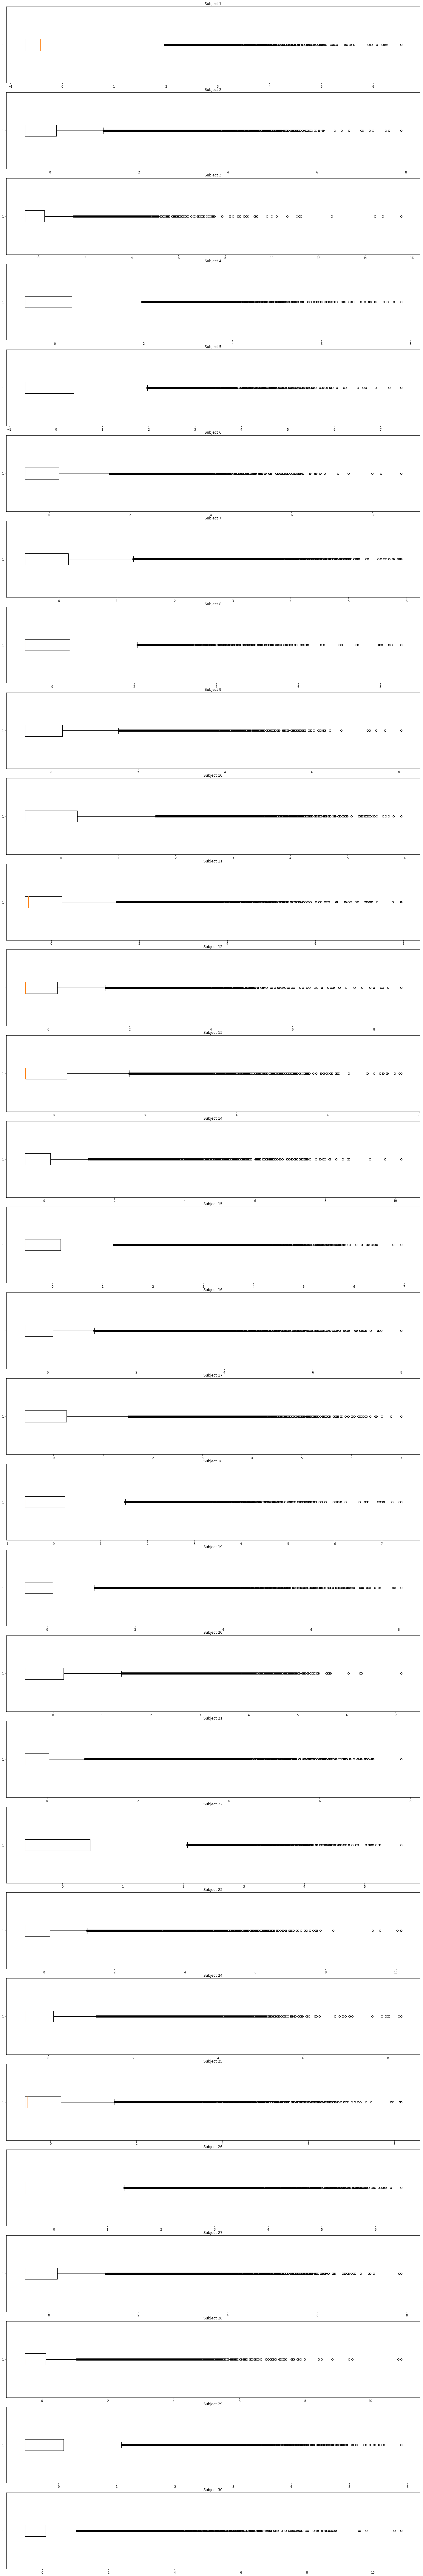

In [30]:
z = []
fig, axes = plt.subplots(nrows=plot_subj, ncols=1, figsize=(20,plot_subj*4))
plt.tight_layout()
cnt = 0
for ai in ai_subj:
    
    z_score = stats.zscore(ai)
    z.append(z_score)
    z_score[(np.abs(stats.zscore(z_score)) < 3).all(axis=0)]
    axes[cnt].boxplot(z_score, vert=False)
    axes[cnt].set_title('Subject ' + str(cnt+1))
    cnt += 1

plt.show()

In [31]:
for i in range(len(z)):
    z[i] = np.array(z[i])
    z_avg = np.average(z[i])
    print('Subject ', i+1, ': ', z_avg)

Subject  1 :  1.585940548688201e-14
Subject  2 :  -1.2607766940055746e-14
Subject  3 :  5.289074014982485e-15
Subject  4 :  -1.7943834943817062e-14
Subject  5 :  8.80501942169885e-16
Subject  6 :  -1.2379562824653678e-14
Subject  7 :  7.569946821657242e-15
Subject  8 :  7.767583414509957e-15
Subject  9 :  1.4652434946465342e-15
Subject  10 :  -1.5238204640998343e-14
Subject  11 :  -1.2390670148590634e-14
Subject  12 :  1.3488268882225631e-14
Subject  13 :  -3.926859931461407e-14
Subject  14 :  -4.19979712210829e-15
Subject  15 :  2.5613611640463307e-15
Subject  16 :  -1.1406063440024134e-14
Subject  17 :  -3.591984647983999e-15
Subject  18 :  -9.72976381692728e-15
Subject  19 :  1.3327694252675326e-14
Subject  20 :  -8.368931963850649e-15
Subject  21 :  -4.91169455095051e-16
Subject  22 :  1.1693434705196052e-14
Subject  23 :  -2.2698000860949584e-14
Subject  24 :  3.1659753731808195e-14
Subject  25 :  2.0465609509042314e-14
Subject  26 :  -2.658329377371582e-14
Subject  27 :  3.300321

In [ ]:
for i in 

In [32]:
print (len(ai_subj))

30


# Activity per day (%)

In [33]:
print('Subject ', 'Walking ', 'Walking Upstairs ','Walking Downstairs ','Sitting ','Standing ','Laying')
avg1,avg2,avg3,avg4,avg5,avg6 = [],[],[],[],[],[]
for i in range(plot_subj):
    percent = [0,0,0,0,0,0]
    for j in all_act[i]:
        percent[j] += 1
    
    percent = np.array(percent, dtype = 'f')
    percent = np.divide(percent , len(all_act[i]))*100
    avg1.append(percent[0])
    avg2.append(percent[1])
    avg3.append(percent[2])
    avg4.append(percent[3])
    avg5.append(percent[4])
    avg6.append(percent[5])
    print(i+1 , percent)

Subject  Walking  Walking Upstairs  Walking Downstairs  Sitting  Standing  Laying
1 [27.377522  15.273775  14.1210375 13.544668  15.273775  14.409222 ]
2 [19.536423 15.89404  15.562914 15.231789 17.880795 15.89404 ]
3 [17.008799 17.302053 14.369501 15.249268 17.888563 18.181818]
4 [18.927444 16.403786 14.195583 15.77287  17.665615 17.0347  ]
5 [18.543047 15.562914 15.562914 14.569536 18.543047 17.218544]
6 [17.538462 15.692307 14.769231 16.923077 17.538462 17.538462]
7 [18.506495 16.558441 15.25974  15.584415 17.207792 16.883118]
8 [17.08185  14.590748 13.523131 16.370108 19.217081 19.217081]
9 [18.055555 17.01389  14.583333 17.36111  15.625    17.36111 ]
10 [18.02721  15.986395 12.92517  18.367348 14.965985 19.727892]
11 [18.670887 17.088608 14.556962 16.772152 14.873418 18.037975]
12 [15.625  16.25   14.375  15.9375 19.0625 18.75  ]
13 [17.431192 16.819572 14.37309  14.984709 17.431192 18.960245]
14 [18.266253 16.718267 13.931889 16.718267 18.575851 15.789473]
15 [16.463415 14.634146

In [34]:
print('Walking ', 'Walking Upstairs ','Walking Downstairs ','Sitting ','Standing ','Laying')
print(np.average(avg1),np.average(avg2),np.average(avg3),np.average(avg4),np.average(avg5),np.average(avg6),)

Walking  Walking Upstairs  Walking Downstairs  Sitting  Standing  Laying
16.826082 15.069029 13.697622 17.178677 18.414211 18.81438


## Activity per min / 15 min

In [35]:
print('Subject ', 'Walking ', 'Walking Upstairs ','Walking Downstairs ','Sitting ','Standing ','Laying')
for i in range(plot_subj):
    percent = [0,0,0,0,0,0]
    for j in all_act[i]:
        percent[j] += 1
    
    percent = np.array(percent, dtype = 'f')
    percent = np.divide(percent , len(all_act[i]))*15
    print(i+1 , percent)

Subject  Walking  Walking Upstairs  Walking Downstairs  Sitting  Standing  Laying
1 [4.1066284 2.2910662 2.1181557 2.0317001 2.2910662 2.1613832]
2 [2.9304636 2.3841062 2.3344371 2.284768  2.6821191 2.3841062]
3 [2.5513196 2.5953078 2.155425  2.28739   2.6832843 2.7272727]
4 [2.8391166 2.4605677 2.1293375 2.3659306 2.6498423 2.555205 ]
5 [2.781457  2.3344371 2.3344371 2.1854303 2.781457  2.5827816]
6 [2.6307693 2.353846  2.2153847 2.5384617 2.6307693 2.6307693]
7 [2.775974  2.4837663 2.288961  2.3376622 2.581169  2.5324676]
8 [2.5622776 2.1886122 2.0284698 2.455516  2.8825622 2.8825622]
9 [2.7083333 2.5520835 2.1875    2.6041665 2.34375   2.6041665]
10 [2.7040815 2.3979592 1.9387755 2.7551022 2.2448978 2.9591837]
11 [2.800633  2.563291  2.1835444 2.515823  2.2310128 2.705696 ]
12 [2.34375  2.4375   2.15625  2.390625 2.859375 2.8125  ]
13 [2.6146789 2.5229359 2.1559634 2.2477064 2.6146789 2.8440368]
14 [2.739938  2.50774   2.0897832 2.50774   2.7863777 2.368421 ]
15 [2.4695122 2.1951218

## Scale 15 min to Day

In [36]:
print('Subject ', 'Walking ', 'Walking Upstairs ','Walking Downstairs ','Sitting ','Standing ','Laying')
avg1,avg2,avg3,avg4,avg5,avg6 = [],[],[],[],[],[]
for i in range(plot_subj):
    percent = [0,0,0,0,0,0]
    for j in all_act[i]:
        percent[j] += 1
    
    percent = np.array(percent, dtype = 'f')
    percent = np.divide(percent , len(all_act[i]))*15*96/60
    avg1.append(percent[0])
    avg2.append(percent[1])
    avg3.append(percent[2])
    avg4.append(percent[3])
    avg5.append(percent[4])
    avg6.append(percent[5])
    print(i+1 , percent)

Subject  Walking  Walking Upstairs  Walking Downstairs  Sitting  Standing  Laying
1 [6.5706053 3.665706  3.3890493 3.2507203 3.665706  3.458213 ]
2 [4.6887417 3.81457   3.7350993 3.655629  4.2913904 3.81457  ]
3 [4.0821114 4.1524925 3.4486802 3.6598241 4.2932544 4.3636365]
4 [4.5425863 3.9369085 3.4069402 3.7854888 4.2397475 4.088328 ]
5 [4.450331  3.7350993 3.7350993 3.4966884 4.450331  4.1324506]
6 [4.209231  3.7661538 3.5446157 4.0615387 4.209231  4.209231 ]
7 [4.4415584 3.974026  3.6623375 3.7402596 4.12987   4.051948 ]
8 [4.099644  3.5017798 3.2455516 3.9288259 4.612099  4.612099 ]
9 [4.3333335 4.0833335 3.5       4.1666665 3.75      4.1666665]
10 [4.3265305 3.8367348 3.1020408 4.4081635 3.5918365 4.734694 ]
11 [4.481013  4.101266  3.4936712 4.0253167 3.5696206 4.329114 ]
12 [3.75  3.9   3.45  3.825 4.575 4.5  ]
13 [4.183486  4.0366974 3.4495416 3.5963302 4.183486  4.550459 ]
14 [4.383901  4.012384  3.3436532 4.012384  4.4582043 3.7894738]
15 [3.9512198 3.5121949 3.0731707 4.31707

In [37]:
print(len(avg1))
print(len(avg2))
print(len(avg3))
print(len(avg4))
print(len(avg5))
print(len(avg6))

30
30
30
30
30
30


In [38]:
print('Walking ', 'Walking Upstairs ','Walking Downstairs ','Sitting ','Standing ','Laying')
print(np.average(avg1),np.average(avg2),np.average(avg3),np.average(avg4),np.average(avg5),np.average(avg6),)

Walking  Walking Upstairs  Walking Downstairs  Sitting  Standing  Laying
4.0382595 3.6165664 3.2874296 4.1228824 4.4194107 4.5154505
